## Noha Magdy Ali
## 160126


# <center> Assignment 1 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.transform import rescale, resize
from math import ceil,floor

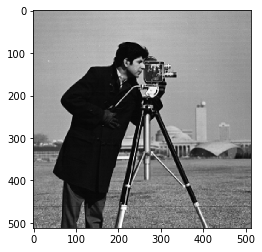

In [5]:
img = data.camera()
plt.imshow(img,'gray',vmin=0,vmax=255)

### Question 1

##### Write a function BitQuantizeImage which takes an 8-bit image (img) and (k), the number of bits to which the image needs to be quantized and returns the KBitQImg quantized image

In [32]:
def BitQuantizeImage (image , k):
    image2=np.copy(image)
    x=255/((2**k)-1)
    image2=image2/x
    return np.floor(image2)
    

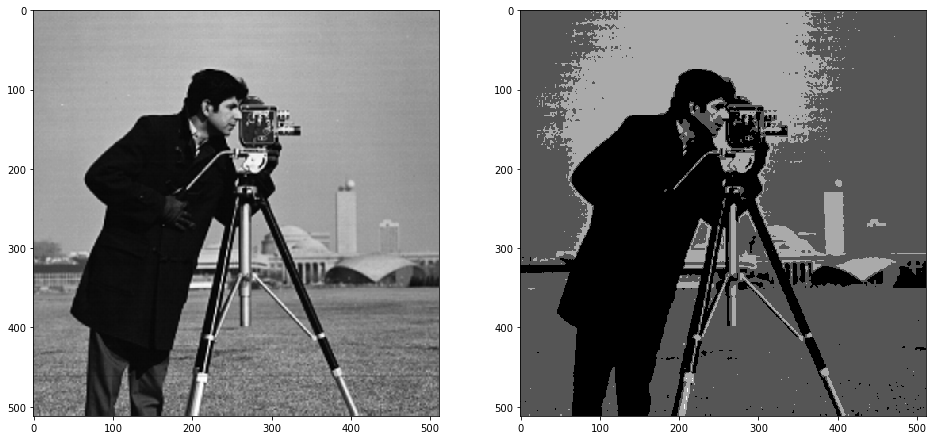

In [37]:
quantized = BitQuantizeImage (img,2)

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow( img ,'gray')
plt.imshow(quantized, 'gray')
plt.show()

### Question 2

##### Write the function ImageHistogram which takes an 8-bit image (img) and an integer (k) that returns a list of k gray level frequencies. 

In [6]:
def ImageHistogram (image , k):
    image2= np.copy(image)
    lst=np.zeros(k+1)
    ranges= 255/k
    for i in range (image2.shape[0]):
        for j in range (image2.shape[1]):
            x= ceil(image2[i,j]/ranges)
            lst[x]+=1
    plt.bar(range(0,k+1),lst)
    return lst

array([  102., 26039., 25058.,  4842.,  3957.,  3568.,  3109.,  3094.,
        6467., 12022., 19174., 20925., 24817., 43043., 39617., 22115.,
        1837.,   747.,   633.,   701.,   277.])

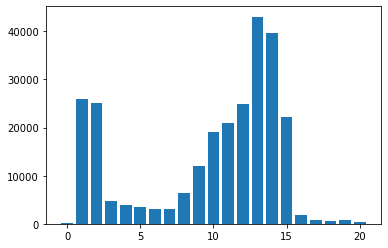

In [6]:
ImageHistogram (img,20)

### Question 3

##### Write the function HistogramEqualize which takes an 8-bit image (img) then calculate the new image after application of cumulative frequency-based histogram equalization; then return the new image and the new histogram. 

In [25]:
def HistogramEqualize(image):
    image2=np.copy(image)
    oldHistogram=ImageHistogram(image2, 255)
    
    oldCDF=np.zeros(256)
    oldCDF[0]=oldHistogram[0]
    for i in range (1,len(oldHistogram)):
        oldCDF[i]=oldHistogram[i]+oldCDF[i-1]
        
    x=(image2.shape[0]*image2.shape[1])/255
    uniformHistogram=np.ones(256)*x
    uniformHistogram[127]+=((image2.shape[0]*image2.shape[1])%255)
    
    newCDF=np.zeros(256)
    newCDF[0]=uniformHistogram[0]
    for j in range (1,len(uniformHistogram)):
        newCDF[j]=uniformHistogram[j]+newCDF[j-1]
        
    newLevels=np.zeros(256)
    for n in range (256):
        current=oldCDF[n]
        for m in range(256):
            if newCDF[m]>= current:
                if abs(newCDF[m]-current) > abs(newCDF[m-1]-current):
                    newLevels[n]=m-1
                else: 
                    newLevels[n]=m
                break
    
    
    for i in range (image2.shape[0]):
        for j in range (image2.shape[1]): 
            image2[i,j]=newLevels[image2[i,j]]
            
    ImageHistogram (image2, 255)        
    return image2

        
    

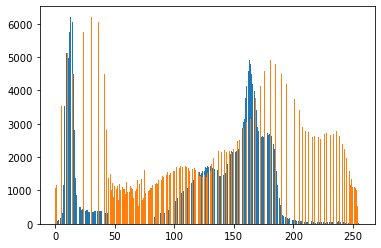

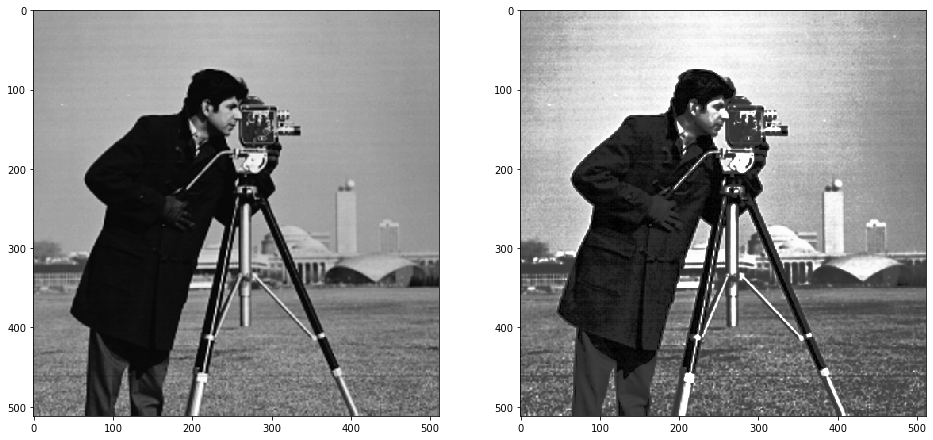

In [26]:
Equalized = HistogramEqualize(img)

# orange histogram is the new one

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow( img ,'gray')
plt.imshow(Equalized, 'gray')
plt.show()